In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SIGNALscripts import plots
import SIGNALscripts.functions as f 

# Auswertung Residuallast-Signale
_Max Nutz, als Teil der Masterarbeit, November 2021_




greift auf die Dateien zu, deren Pfade in der folgenden Zelle eingegeben werden.

## Inhalt
- Häufigkeiten
    - Anteil positiver/negativer Stunden insgesamt
    - Längste positive Phase/längste negative Phase
    - Phasenlängen von x Stunden negativ/positiv
- Zusammenhang mit der Residuallast
    - Häufigkeit Signal positiv und RES > 0 
    - Häufigkeit Signal negativ und RES < 0
 
### Input
- dateien: Namen der Dateien, die die Signale enthalten (relativer oder absoluter Pfad möglich)
- names: Namen, die später für die Identifikation in diesem Notebook verwendet werden können (Anzahl Dateinamen und Namen muss übereinstimmen) 

In [29]:
###
dateien = ['/home/max/Dokumente/FH/Master_thesis/NEW_pypsa-eur/pypsa-eur/summary/Netzwerkanalyse/2030_REF(igw17)/Schaltsignal_RES3.csv',
            '/home/max/Dokumente/FH/Master_thesis/NEW_pypsa-eur/pypsa-eur/summary/Netzwerkanalyse/2030_UBA17/Schaltsignal_RES3.csv',
           '/home/max/Dokumente/FH/Master_thesis/NEW_pypsa-eur/pypsa-eur/summary/Netzwerkanalyse/2050_UBA17/Schaltsignal_RES3.csv',
           '/home/max/Dokumente/FH/Master_thesis/NEW_pypsa-eur/pypsa-eur/summary/Netzwerkanalyse/2050_VEIGL17/Schaltsignal_RES3.csv']
names = ['Referenzszenario', 'Umweltbundesamt 2030', 'Umweltbundesamt 2050', 'Veigl 2050']
resload = pd.read_csv('/home/max/Dokumente/FH/Master_thesis/NEW_pypsa-eur/pypsa-eur/summary/Netzwerkanalyse/2030_REF(igw17)/RES_pro_Stunde.csv', header = 1, names = ['snapshots', 'signal'])
###
sdf = f.import_func(dateien, names)

## Anforderungen an das Dataframe
- csv-file mit einer header-Zeile und zwei Spalten
    - erste Spalte: Index bzw. Datums- und Zeitangaben
    - zweite Spalte: Signal
- Signal: binäres Signal x mit $x \in [0,1]$
- mindestens 2 negative bzw. positive Einträge

**$\rightarrow$ Signal erfüllt die Anforderungen zur Auswertung:**

In [13]:
f.check_input(sdf[1])

True

## Häufigkeits-Analyse
### Allgemeine Statistik
- Anteil Freigabe: gibt an, welchen Anteil der gesamt vergangenen Zeit eine Freigabe für Lastverschiebungspotentiale `1` gebracht wird. 
- Anteil Sperre: gibt an, welchen Anteil der gesamt vergangenen zeit eine Sperre`0` gebracht wird.
- Längstes Freigabe: Gibt die längste Zeitdauer, die durchgehend eine Freigabe `1` erscheint, an
- Längstes Sperre: Gibt die längste Zeitdauer, die durchgehend eine Sperre `0`erscheint, an
- Mean Sperre: Mittelwert der Zeitdauern, die durchgehend eine Sperre `0` erscheint
- Mean Freigabe: Mittelwert der Zeitdauern, die durchgebend eine Freigabe `1` erscheint

Alle größenbehafteten Angaben werden in Stunden angegeben.

In [14]:
f.statistics(sdf)

,Name,Anteil Freigabe,Anteil Sperre,Längste Sperre [h],Mean Sperre [h],Längste Freigabe [h],Mean Freigabe [h]
0,Referenzszenario,0.54,0.46,21.0,5.95,63.0,7.02
1,Umweltbundesamt 2030,0.60,0.40,19.0,5.18,113.0,7.92
2,Umweltbundesamt 2050,0.65,0.35,18.0,5.36,212.0,10.11
3,Veigl 2050,0.65,0.35,19.0,5.64,213.0,10.62


In [19]:
print((f.statistics(sdf)[['Name', 'Anteil Freigabe', 'Längste Freigabe [h]', 'Längste Sperre [h]']]).to_latex(index = False))

\begin{tabular}{lrrr}
\toprule
                Name &  Anteil Freigabe &  Längste Freigabe [h] &  Längste Sperre [h] \\
\midrule
    Referenzszenario &             0.54 &                  63.0 &                21.0 \\
Umweltbundesamt 2030 &             0.60 &                 113.0 &                19.0 \\
Umweltbundesamt 2050 &             0.65 &                 212.0 &                18.0 \\
          Veigl 2050 &             0.65 &                 213.0 &                19.0 \\
\bottomrule
\end{tabular}



### Zeitdauern eines durchgängigen Signals
Die Daten sind im DataFrame 'res' gespeichert und können mit der auskommentierten Zeile als csv gespeichert werden.

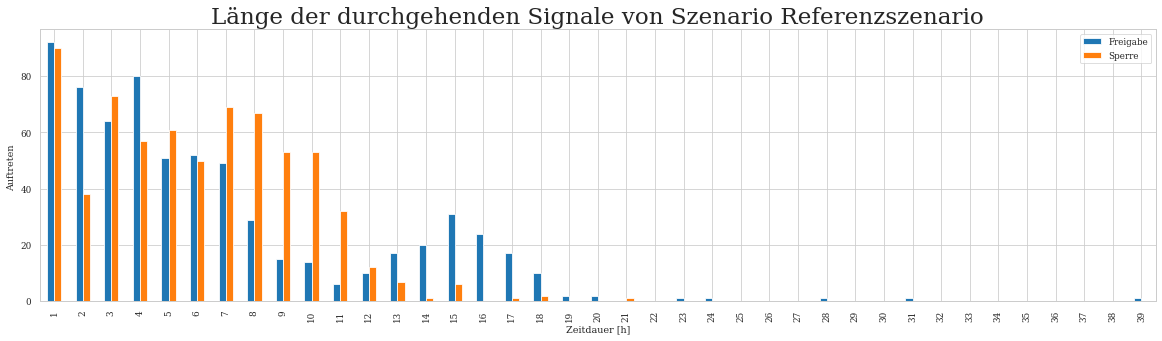

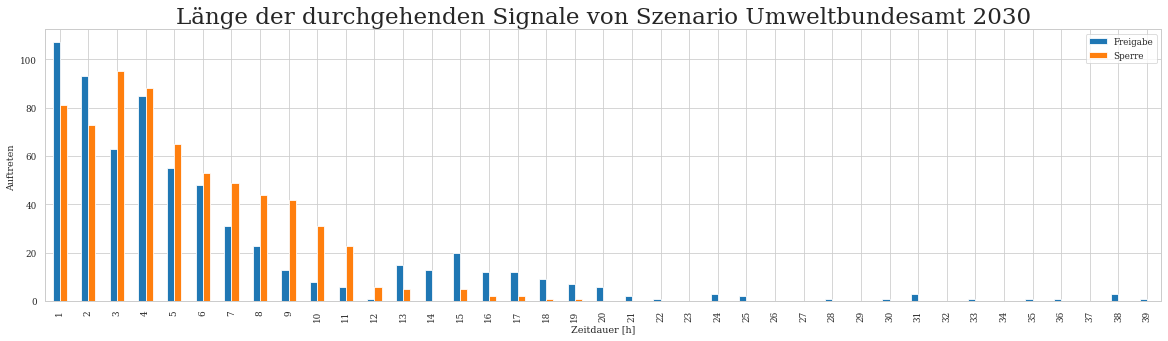

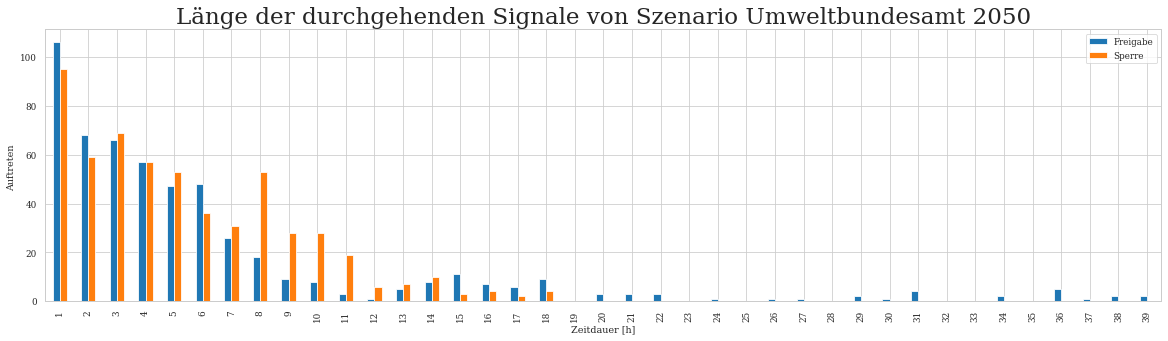

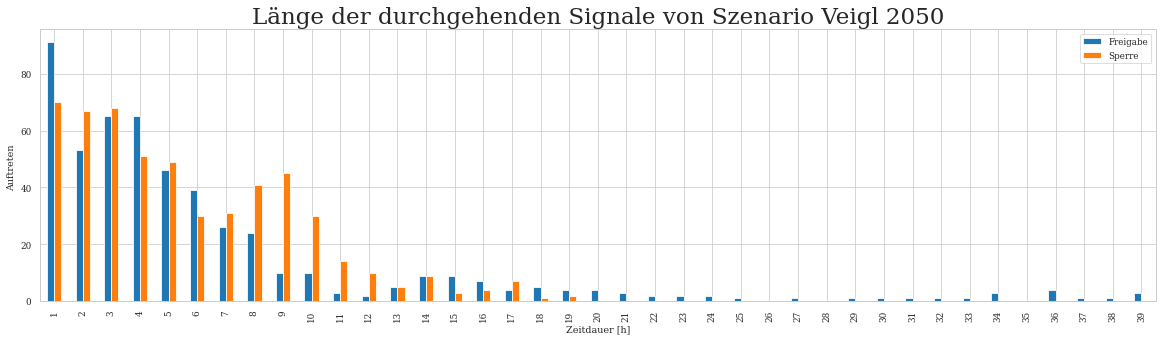

In [16]:
for i in range(0,len(sdf[1])):
    res = f.all_lengths(sdf[1][i]['signal'])
    res[1:40].plot(kind = 'bar', figsize=(20,5))
    plt.title('Länge der durchgehenden Signale von Szenario ' + sdf[0][i], fontsize = 23)
    plt.xlabel('Zeitdauer [h]')
    plt.ylabel('Auftreten ')
    #res.to_csv('pathtofolder/ZD_'+ sdf[0][i].csv)

## Zusammenhang mit der Residuallast
- Freigabe RES > 0 gibt an, zu wie vielen Stunden das Schaltsignal Freigabe gibt und die Residuallast positiv ist
- Freigabe RES < 0 gibt an, zu wie vielen Stunden das Schaltsignal Freigabe gibt und die Residuallast negativ ist
- Sperre RES > 0 gibt an, zu wie vielen Stunden das Schaltsignal eine Sperre ausgibt und die Residuallast positiv ist
- Sperre RES < 0 gibt an, zu wie vielen Stunden das eine Sperre ausgibt und die die Residuallast negativ ist
- Anteil Sperre RES < 0 gibt an, welcher Anteil der negativen Residuallast eine Sperre auslöst $\rightarrow$ sollte minimal sein
- Anteil Freigabe RES > 0 gibt an, welcher Anteil der positiven Residuallast eine Freigabe auslöst $\rightarrow$ abhängig von der Zeitreihe der Residuallast nicht zu klein

In [30]:
f.signal_res(sdf, resload)

,Name,Freigabe RES > 0,Freigabe RES < 0,Sperre RES > 0,Sperre RES < 0,Anteil Sperre RES < 0,Anteil Freigabe RES > 0
0,Referenzszenario,1798.0,2934.0,3875.0,152.0,0.049,0.317
1,Umweltbundesamt 2030,4070.0,5944.0,7276.0,228.0,0.037,0.359
2,Umweltbundesamt 2050,6733.0,8991.0,10286.0,267.0,0.029,0.396
3,Veigl 2050,9393.0,12043.0,13299.0,301.0,0.024,0.414


In [31]:
print((f.signal_res(sdf, resload)[['Name', 'Anteil Sperre RES < 0', 'Anteil Freigabe RES > 0']]).to_latex(index = False))

\begin{tabular}{lrr}
\toprule
                Name &  Anteil Sperre RES < 0 &  Anteil Freigabe RES > 0 \\
\midrule
    Referenzszenario &                  0.049 &                    0.317 \\
Umweltbundesamt 2030 &                  0.037 &                    0.359 \\
Umweltbundesamt 2050 &                  0.029 &                    0.396 \\
          Veigl 2050 &                  0.024 &                    0.414 \\
\bottomrule
\end{tabular}

